# Datenplots

In [271]:
%matplotlib inline
import pandas as pd
from pandas import Timestamp
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.patches as patches
import re
import dask.bag as db
import json
import scipy.optimize

## Häufigkeit von größen Threads

In [279]:
df = pd.read_csv('../../data/biggest_threads_2017_1.csv',header=None).rename(columns={0: 'id', 1: 'count'})
df.head()

,id,count
0,t3_4090vf,43539
1,t3_415q8j,38011
2,t3_42inji,32779
3,t3_41aepa,30738
4,t3_3zx829,30513


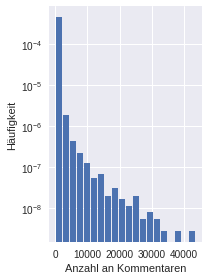

In [295]:
plt.hist(df['count'],normed=True,log=True,bins=20,rwidth=0.8)
# plt.plot(df['count'][0:100],'.')
# plt.title('Einreichungen, sortiert nach Kommentarmenge im Januar 2016')
plt.xlabel('Anzahl an Kommentaren')
plt.ylabel('Häufigkeit')
plt.title("")
fig = plt.gcf()
fig.set_size_inches(3,4)
plt.tight_layout()
fig.savefig('../../doc/figures/biggest_threads_2017_1.pdf')


In [ ]:
# TODO: Modelierung der Verteilung
sum(df['count'][0:int(len(df)*0.2)]) / sum(df['count'])
# pareto(df['count'][2], 1.2, min(df['count']))
def pareto(x,k, xmin):
    return k * xmin ** k / (x ** (k+1))
# scipy.optimize()

## Verteilung der Upvotes auf Kommentare

In [296]:
ups = pd.read_csv('../../data/upvote_distribution2016_1.csv')
ups.head()

,ups,n
0,1,27986680
1,2,10456825
2,3,5137637
3,0,2528393
4,4,2153727


In [297]:
ups = ups.sort_values('ups')

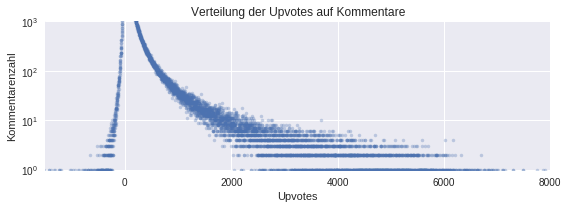

In [298]:
plt.semilogy(ups.ups,ups.n ,  '.', alpha=0.3)
plt.xlim([-1500, 8000])
plt.ylim([0,1000])
plt.xlabel('Upvotes')
plt.ylabel('Kommentarenzahl')
fig = plt.gcf()
fig.set_size_inches(8,3)
plt.title('Verteilung der Upvotes auf Kommentare')
fig = plt.gcf()
ax = fig.add_subplot(111)
# ax.annotate('Nur sehr wenige Kommentare\nhaben viel Upvotes', xy=(10, 10), xytext=(4000, 10) )
# ax.add_patch(
#     patches.Rectangle(
#         (0, 0),   # (x,y)
#         80000,          # width
#         10000,          # height
#         alpha=1)
# )
plt.tight_layout()

fig.savefig('../../doc/figures/upvote_distribution2016_1.pdf')

(array([ 2971.,  1422.,   666.,   308.,   139.,    68.,    30.,    14.,
            6.,     3.]),
 array([  0.        ,   1.71472392,   3.42944785,   5.14417177,
          6.8588957 ,   8.57361962,  10.28834354,  12.00306747,
         13.71779139,  15.43251532,  17.14723924]),
 <a list of 10 Patch objects>)

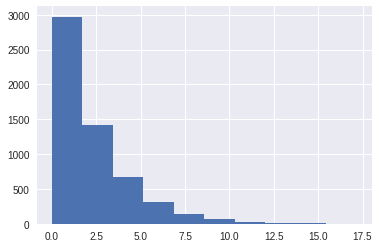

In [24]:
ups['bins'] = np.round(ups['ups'] / 400) * 400
# bined = ups.groupby('bins').sum()

# plt.bar(bined.index, bined['n'], log=True)
# plt.xlim([-1500, 8000])
# plt.ylim([0,800000])
# fig = plt.gcf()
# fig.set_size_inches(8,8)
# bined
plt.hist(np.log(ups.n),bins=10)

## Größe des Datensatz

In [443]:
counts = pd.read_csv('../../data/monthlyCount.tsv',sep='  ', header=None).rename(columns={0: 'date', 1: 'count'})
counts.head()
dates = counts.date.str.extract('(\d+)-(\d+)', expand=False).rename(columns={0: 'year', 1: 'month'})
dates['day'] = 1
counts = counts.set_index(pd.to_datetime(dates))
counts['cumsum'] = np.cumsum(counts['count'])

/home/jakob/miniconda3/envs/ml/lib/python3.6/site-packages/ipykernel_launcher.py:1: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  """Entry point for launching an IPython kernel.


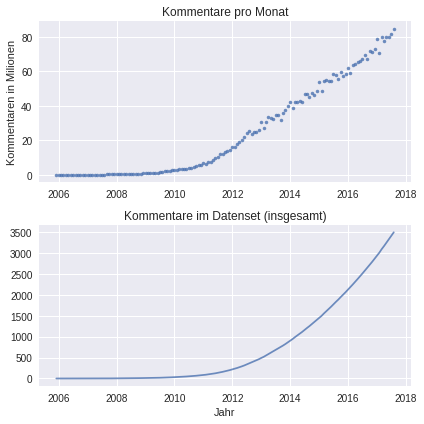

In [445]:

plt.subplot(211)
plt.title("Kommentare pro Monat")
plt.ylabel('Kommentaren in Milionen')
plt.plot_date(counts.index, counts['count'] / 10**6,'.',alpha=0.8)
plt.subplot(212)
plt.plot_date(counts.index, counts['cumsum'] / 10**6,'-',alpha=0.8)
plt.xlabel('Jahr')

plt.title("Kommentare im Datenset (insgesamt)")
fig = plt.gcf()
fig.set_size_inches(6,6)

fig = plt.gcf()
plt.tight_layout()
fig.savefig('../../doc/figures/monthlyCount.pdf')

In [198]:
sum(counts['2016/1':'2016/12']['count'])

799897840

In [218]:
int(counts['2016/12']['cumsum'] ) - int(  counts['2016/1']['cumsum'])

737906108

In [208]:
counts['2016/1']['count']

2016-01-01    61991732
Name: count, dtype: int64

In [215]:
counts['cumsum'] = np.cumsum(counts['count'])

In [213]:
len(np.cumsum(counts['count']))

141

In [214]:
len(counts)

141

## Beispiel-JSON

In [262]:
def short(d):
    d['body'] = d['body'][:10] + ' ...'
    return d
# example = pd.DataFrame(list((db.read_text('../../data/example_set.csv').map(json.loads).map(lambda d: short(d)))))
list((db.read_text('../../data/example_set.csv').map(json.loads).map(lambda d: short(d))))[2]



{'author': 'RoboChrist',
 'author_flair_css_class': None,
 'author_flair_text': None,
 'body': 'There\'s "s ...',
 'controversiality': 0,
 'created_utc': 1452097977,
 'distinguished': None,
 'edited': False,
 'gilded': 0,
 'id': 'cyo5nvp',
 'link_id': 't3_3zpp3w',
 'parent_id': 't1_cyo4in3',
 'retrieved_on': 1454317397,
 'score': 158,
 'stickied': False,
 'subreddit': 'dataisbeautiful',
 'subreddit_id': 't5_2tk95',
 'ups': 158}

## Kommentarlänge

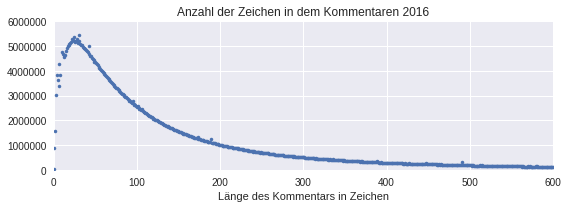

In [400]:
bl = pd.read_csv('../../data/comment_length_frequencies2017.csv')
# Interpolate 9
bl[9] = (bl['count'][8] + bl['count'][10]) / 2
# bl.head()
plot = plt.plot(bl['length'], bl['count'],'.')
fig = plt.gcf()
fig.set_size_inches(4.22, 2)
plt.title('Anzahl der Zeichen in dem Kommentaren 2016')
plt.xlabel('Länge des Kommentars in Zeichen')
plt.ylim(0,6000000)
plt.xlim(0,600)
fig = plt.gcf()
fig.set_size_inches(8,3)
plt.tight_layout()
plt.savefig('../../doc/figures/comment_length_frequencies2016.pdf')

{'boxes': [<matplotlib.lines.Line2D at 0x7f6f6f3e7438>],
 'caps': [<matplotlib.lines.Line2D at 0x7f6f6f743eb8>,
 'fliers': [<matplotlib.lines.Line2D at 0x7f6f6f766390>],
 'means': [],
 'medians': [<matplotlib.lines.Line2D at 0x7f6f6f764940>],
 'whiskers': [<matplotlib.lines.Line2D at 0x7f6f6f3e7dd8>,
  <matplotlib.lines.Line2D at 0x7f6f6f3e7fd0>]}

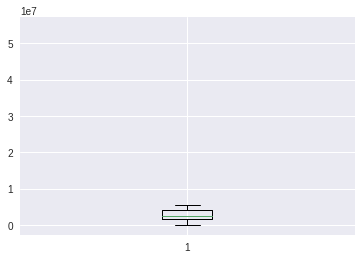

In [409]:
plt.boxplot(bl['count'][:200])

### Durschnittliche Zeichenzahl
Der Durschnitt ist hier eigentlich nicht wirklich hilfreich,
aufgrund der Verteilung der Zeichenzahl

In [388]:
(bl['count'] / (bl['count'].sum()) * bl['length']).sum()

177.42531565655935

Zeichenzahl 10 bis 150 machen wie viel Prozent aus?

In [391]:
bl['count'][10:150].sum() / bl['count'].sum()

0.58385815243606609

In [399]:
# Interpolate 9
bl[9] = (bl['count'][8] + bl['count'][10]) / 2

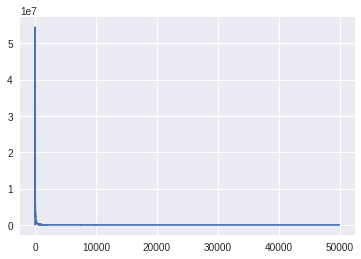

In [404]:
plt.plot(bl['length'], bl['count'])

## Abschätzung der benötigten Pixel

In [442]:
avg = round((bl['count'] / (bl['count'].sum()) * bl['length']).sum())
avg * 4000 /  80 * 22

194700.0